# Read the data
There are two data sets from the years 2018 and 2019.

In [20]:
import pandas as pd

# Load the data
data_2018 = pd.read_csv('2018.csv')
data_2019 = pd.read_csv('2019.csv')

# Print the shape of both data sets
print(data_2018.shape, data_2019.shape)

(156, 9) (156, 9)


# Combine the 2018 and 2019 data sets into one CSV file
Since the two data sets have the same shape, we can combine them directly.

In [21]:
# Combine the two data sets
combined_data_set = pd.concat([data_2018, data_2019], ignore_index = True)

# Save it to a new csv file
combined_data_set.to_csv('combined_data.csv', index = False)
combined_data_set

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
307,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
308,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
309,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
310,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


# Data Cleaning and Feature Selecting
Check for redundant columns, missing values, and duplicates.

1. Drop the column 'Overall rank' since it is directly derived from the 'Score' column, and it is not useful for predicting the happiness score.
2. Drop the column 'Country or region' since it is not useful for our model.

In [22]:
# drop the columns
combined_data_cleaned = combined_data_set.drop(columns = ['Overall rank', 'Country or region'])
combined_data_cleaned

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...
307,3.334,0.359,0.711,0.614,0.555,0.217,0.411
308,3.231,0.476,0.885,0.499,0.417,0.276,0.147
309,3.203,0.350,0.517,0.361,0.000,0.158,0.025
310,3.083,0.026,0.000,0.105,0.225,0.235,0.035


3. Check the correlations between each column

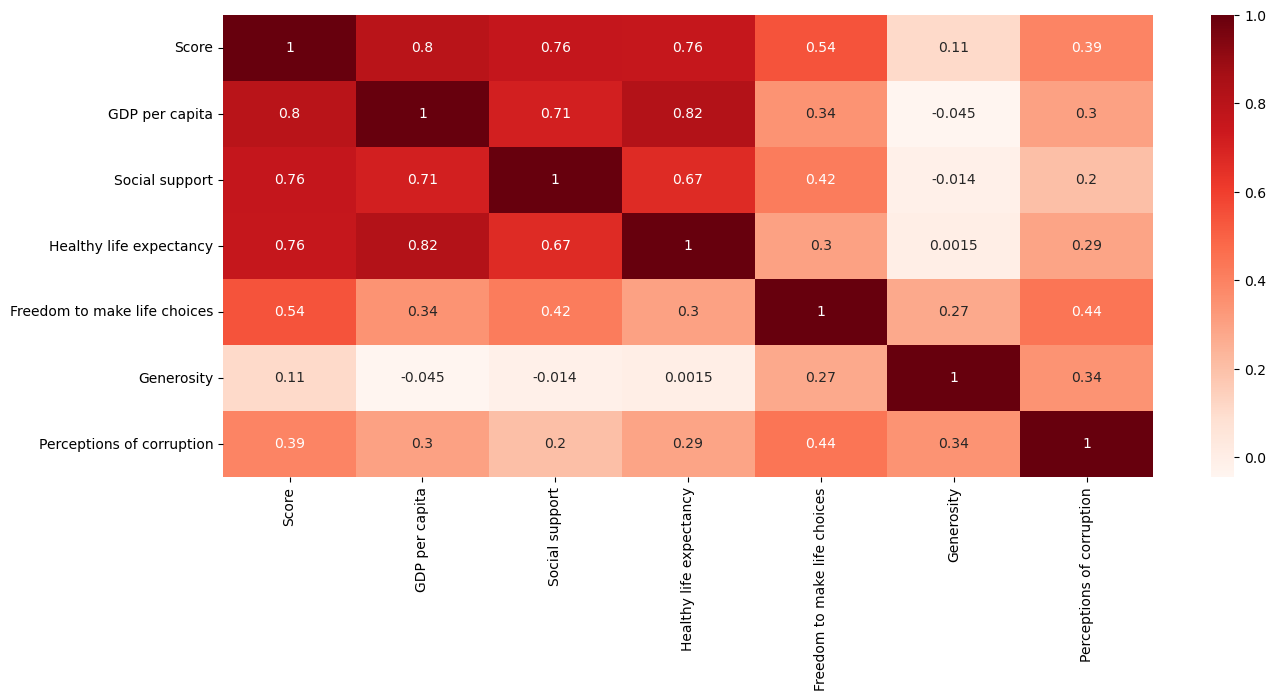

In [35]:
# use seaborn to plot the heatmap of the correlations  with each other
import seaborn as sns
import matplotlib.pyplot as plt
corr = combined_data_cleaned.corr()
plt.figure(figsize = (15,6))
sns.heatmap(corr, annot = True, cmap = "Reds")
plt.show()

4. Check for duplicates, if there is no duplicate, we do not need to drop anything

In [24]:
# show how many duplicates there are
duplicate_num = combined_data_cleaned.duplicated().sum()
duplicate_num

0

5. Check for missing value

In [25]:
# show how many missing values there are
missing = pd.isnull(combined_data_cleaned)
missing.sum()

Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

There is only one missing value which is not a big amount to affect the prediction and the analysis, so we can simply replace it with the mean or the median.

Calculate the mean and the median of the column 'Perceptions of corruption'. We will use the median because it seems like there is outliner in this column.

In [26]:
# Calculate the mean 
mean_poc = combined_data_cleaned['Perceptions of corruption'].mean()
print(mean_poc)

# Calculate the median
median_poc = combined_data_cleaned['Perceptions of corruption'].median()
print(median_poc)

0.11129903536977494
0.082


In [27]:
# replace the missing value with the median
combined_data_cleaned['Perceptions of corruption'].fillna(median_poc, inplace = True)
missing = pd.isnull(combined_data_cleaned)
missing.sum()

Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [28]:
combined_data_cleaned

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...
307,3.334,0.359,0.711,0.614,0.555,0.217,0.411
308,3.231,0.476,0.885,0.499,0.417,0.276,0.147
309,3.203,0.350,0.517,0.361,0.000,0.158,0.025
310,3.083,0.026,0.000,0.105,0.225,0.235,0.035


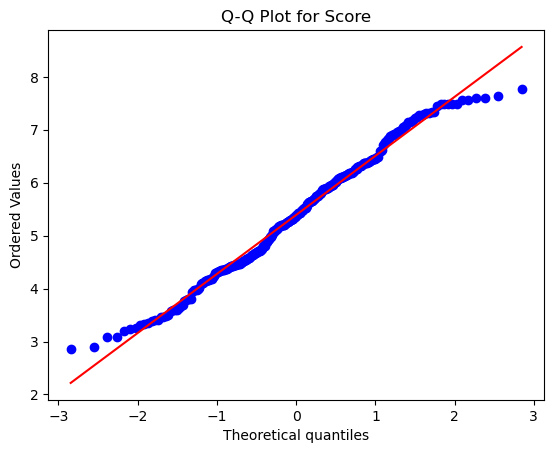

In [29]:
# Use Q-Q plot to display the data distribution for happiness score
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(combined_data_cleaned['Score'], dist = "norm", plot = plt)
plt.title('Q-Q Plot for Score')
plt.show()

# Cross Validation for Linear Regression

In [30]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

linreg = linear_model.LinearRegression() 

# X is the columns of features and y is the column of happiness score
X = combined_data_cleaned.drop(columns = ['Score'])
y = combined_data_cleaned['Score']

# a list to store mse scores
mse_scores = []

# split the dataset into 70% training and 30% testing with a random_state to keep the consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# a list to store accuracies
accuracy = []

# five-fold cross validation
kf = KFold(n_splits = 5, random_state = 0, shuffle = True)

# standardise the data and perform cross validation and caluculate the mse and accuracy
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_val_fold_scaled = scaler.transform(X_val_fold)
    
    linreg.fit(X_train_fold_scaled, y_train_fold)
    y_pred = linreg.predict(X_val_fold_scaled)
    mse = mean_squared_error(y_val_fold, y_pred)
    mse_scores.append(mse)
    accuracy.append(linreg.score(X_val_fold_scaled, y_val_fold))

# display the average mse and average accuracy
print(f"Cross Validation Accuracy: {sum(accuracy) / len(accuracy)}")  
print(f"Cross Validation MSE: {sum(mse_scores) / len(mse_scores)}")

Cross Validation Accuracy: 0.7656162571918175
Cross Validation MSE: 0.297824974816039


# Linear Regression Training and Testing

In [31]:
scaler = StandardScaler()
linreg = linear_model.LinearRegression() 

# X is the columns of features and y is the column of happiness score
X = combined_data_cleaned.drop(columns = ['Score'])
y = combined_data_cleaned['Score']

# split the dataset into 70% training and 30% testing with a random_state to keep the consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# standardise the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train the linear regression model
model = linreg.fit(X_train_scaled, y_train)

y_train_pred = linreg.predict(X_train_scaled)
y_test_pred = linreg.predict(X_test_scaled)

# show the scores and mse
print(f"Training Accuracy: {linreg.score(X_train_scaled, y_train)}")
print(f"Testing Accuracy: {linreg.score(X_test_scaled, y_test)}")
print(f"training MSE:, {mean_squared_error(y_train, y_train_pred)}")
print(f"testing MSE:, {mean_squared_error(y_test, y_test_pred)}")
print(linreg.coef_)

Training Accuracy: 0.7822723870081627
Testing Accuracy: 0.7752867193989467
training MSE:, 0.27426684897295855
testing MSE:, 0.26560710288070793
[0.3853215  0.30077019 0.25785329 0.17945498 0.04708411 0.11649377]


# SVR linear kernel Training and Testing

In [32]:
from sklearn.svm import SVR
scaler = StandardScaler()

# X is the columns of features and y is the column of happiness score
X = combined_data_cleaned.drop(columns = ['Score'])
y = combined_data_cleaned['Score']

# split the dataset into 70% training and 30% testing with a random_state to keep the consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# standardise the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# use the linear kernel
svr = SVR(kernel = 'linear')

# train the SVR model
svr.fit(X_train_scaled, y_train)
y_train_pred = svr.predict(X_train_scaled)
y_test_pred = svr.predict(X_test_scaled)

# show the scores and mse
print(f"Testing Accuracy: {svr.score(X_test_scaled, y_test)}")
print(f"Training Accuracy: {svr.score(X_train_scaled, y_train)}")
print("testing MSE:", mean_squared_error(y_test, y_test_pred))
print("training MSE:", mean_squared_error(y_train, y_train_pred))

Testing Accuracy: 0.7625063549063007
Training Accuracy: 0.7762364630693727
testing MSE: 0.28071326651096395
training MSE: 0.28187017413959436


# Cross Validation for SVR

In [33]:
# X is the columns of features and y is the column of happiness score
X = combined_data_cleaned.drop(columns = ['Score'])

y = combined_data_cleaned['Score']

mse_scores = []

# split the dataset into 70% training and 30% testing with a random_state to keep the consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

scaler = StandardScaler()
# use rbf kernel
svr = SVR(kernel = 'rbf')

# a list to store accuracies
accuracy = []

# five-fold cross validation
kf = KFold(n_splits = 5, random_state = 0, shuffle = True)

# standardise the data and perform cross validation and caluculate the mse and accuracy
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_val_fold_scaled = scaler.transform(X_val_fold)
    
    svr.fit(X_train_fold_scaled, y_train_fold)
    y_pred = svr.predict(X_val_fold_scaled)
    mse = mean_squared_error(y_val_fold, y_pred)
    mse_scores.append(mse)
    accuracy.append(svr.score(X_val_fold_scaled, y_val_fold))

# display the average mse and average accuracy
print(f"Cross Validation Accuracy: {sum(accuracy) / len(accuracy)}")  
print(f"Cross Validation MSE: {sum(mse_scores) / len(mse_scores)}")

Cross Validation Accuracy: 0.7889108690067959
Cross Validation MSE: 0.2737446817472427


# SVR rbf kernel Training and Testing

In [34]:
scaler = StandardScaler()

# X is the columns of features and y is the column of happiness score
X = combined_data_cleaned.drop(columns = ['Score'])

y = combined_data_cleaned['Score']

# split the dataset into 70% training and 30% testing with a random_state to keep the consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# standardise the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# use the rbf kernel
svr = SVR(kernel = 'rbf')

# train the SVR model
svr.fit(X_train_scaled, y_train)
y_train_pred = svr.predict(X_train_scaled)
y_test_pred = svr.predict(X_test_scaled)

# show the scores and mse
print(f"Testing Accuracy: {svr.score(X_test_scaled, y_test)}")
print(f"Training Accuracy: {svr.score(X_train_scaled, y_train)}")
print("testing MSE:", mean_squared_error(y_test, y_test_pred))
print("training MSE:", mean_squared_error(y_train, y_train_pred))

Testing Accuracy: 0.8463276224891828
Training Accuracy: 0.8755698586447325
testing MSE: 0.18163801834170407
training MSE: 0.15674200583849918
